In [1]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from skimage import io 

%matplotlib inline

In [ ]:
cricket = io.imread('cricket.jpg')
kitty = io.imread('kitty.jpg')
df = pd.DataFrame(['cricket', 'kitty'], columns=['Image'])

print(cricket.shape, kitty.shape)

NameError: name 'io' is not defined

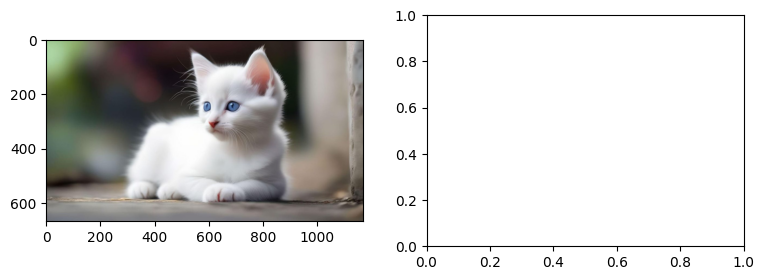

In [ ]:
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cricket)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(kitty)

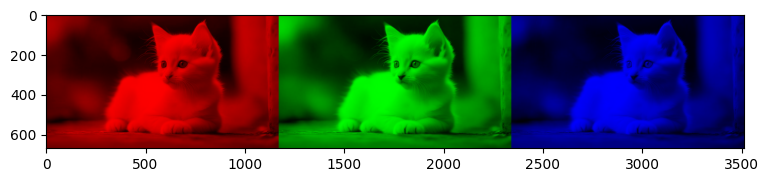

In [ ]:
kitty_r = kitty.copy() 
kitty_r[:,:,1] = kitty_r[:,:,2] = 0
kitty_g = kitty.copy()
kitty_g[:,:,0] = kitty_g[:,:,2] = 0
kitty_b = kitty.copy()
kitty_b[:,:,0] = kitty_b[:,:,1] = 0
plot_image = np.concatenate((kitty_r, kitty_g, kitty_b), axis=1)
plt.figure(figsize = (9,3))
plt.imshow(plot_image)

In [ ]:
kitty_r[:, :, 0]
# kitty_b[:, :, 0]
# kitty_g[:, :, 0]


array([[153, 153, 154, ..., 117, 114, 114],
       [153, 153, 154, ..., 117, 114, 114],
       [154, 154, 154, ..., 116, 114, 114],
       ...,
       [109, 109, 109, ...,  83,  83,  83],
       [109, 109, 109, ...,  83,  83,  83],
       [109, 109, 109, ...,  83,  83,  83]], dtype=uint8)

In [ ]:
from skimage.color import rgb2gray
pgs = rgb2gray (cricket)
lgs = rgb2gray(kitty)
print("Image shape: ", lgs.shape, "\n")
print('Image Shape:', pgs.shape, '\n')

Image shape:  (669, 1170) 

Image Shape: (658, 1170) 



In [ ]:
print('2D image pixel map')
print(np.round(pgs, 2))

2D image pixel map
[[0.2  0.2  0.2  ... 1.   1.   1.  ]
 [0.2  0.2  0.2  ... 1.   1.   1.  ]
 [0.2  0.2  0.2  ... 1.   1.   1.  ]
 ...
 [0.44 0.44 0.44 ... 0.47 0.47 0.46]
 [0.44 0.44 0.44 ... 0.47 0.47 0.46]
 [0.44 0.44 0.44 ... 0.47 0.47 0.46]]


In [ ]:
print("Flattened pixel map")
print(np.round(pgs.flatten(), 2))

Flattened pixel map
[0.2  0.2  0.2  ... 0.47 0.47 0.46]


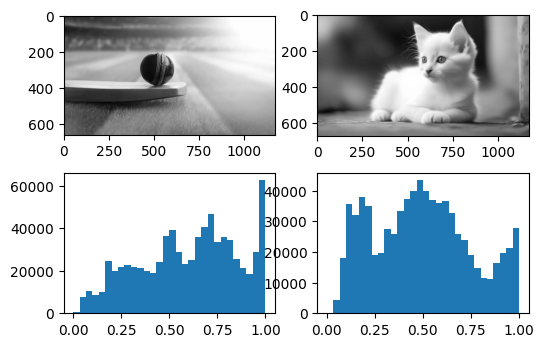

In [ ]:
fig = plt.figure(figsize = (6,4))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(pgs, cmap="gray")
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(lgs, cmap="gray")
ax3 = fig.add_subplot (2,2,3)
p_freq, p_bins, c_patches = ax3.hist (pgs.flatten(), bins=30)
ax4 = fig.add_subplot (2,2,4)
l_freq, l_bins, l_patches = ax4.hist (lgs.flatten(), bins=30)

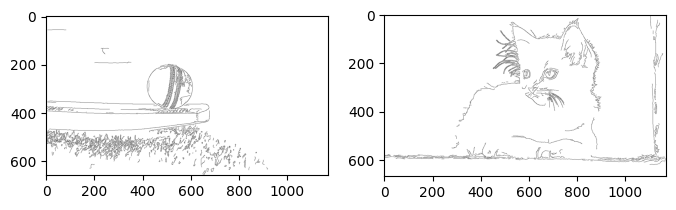

In [ ]:
from skimage.feature import canny
phone_edges = canny (pgs, sigma=1)
lion_edges = canny (lgs, sigma=1)
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(phone_edges, cmap='binary')
ax2=fig.add_subplot(1,2,2)
ax2.imshow(lion_edges, cmap='binary')

(669, 1170)


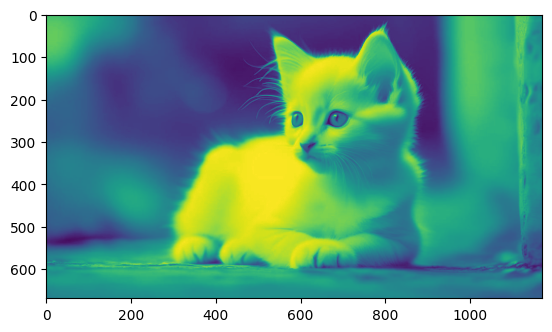

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("kitty.jpg", 0)
plt.imshow(image)
print(image.shape)

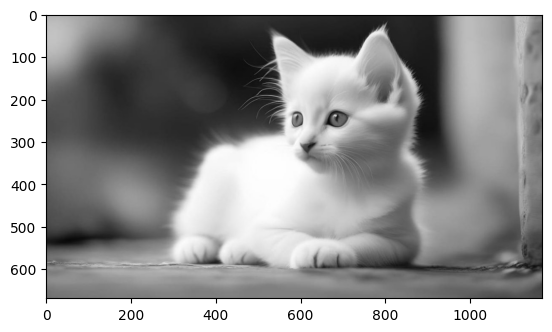

In [ ]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

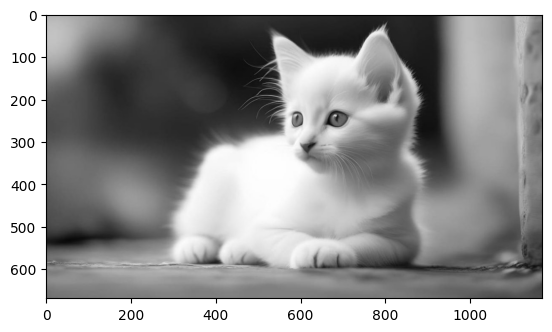

In [ ]:
im = cv2.imread("kitty.jpg", 0)
plt.imshow(img)
plt.imshow(img, cmap="gray")

Text(0.5, 1.0, 'Vertical image')

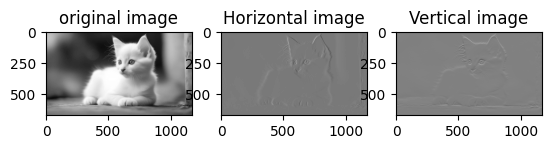

In [ ]:
img1=cv2.Sobel (im, cv2.CV_64F,1,0,5) 
img2=cv2.Sobel(im, cv2.CV_64F,0,1,5)
plt.subplot(1,3,1)
plt.imshow(im, cmap='gray') 
plt.title("original image") 
plt.subplot (1,3,2)
plt.imshow(img1, cmap='gray') 
plt.title("Horizontal image")
plt.subplot(1,3,3)
plt.imshow(img2, cmap='gray')
plt.title("Vertical image")

Text(0.5, 1.0, 'Laplacian Image')

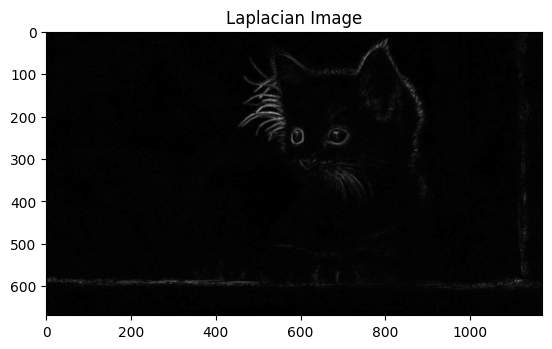

In [ ]:
blurred = cv2.GaussianBlur (image, (3, 3), 0)
# Apply Laplacian filter
laplacian = cv2.Laplacian (blurred, cv2.CV_64F)
# Convert to absolute values
laplacian_abs = cv2.convertScaleAbs (laplacian)
plt.imshow(laplacian_abs, cmap="gray") 
plt.title("Laplacian Image")